In [2]:
# ✅ STEP 1: Import libraries
import pandas as pd
import numpy as np

# ✅ STEP 2: Set seed and constants
np.random.seed(42)
num_farms = 2227

# ✅ STEP 3: Define categories
zones = ['Pune', 'Mumbai', 'Nashik', 'Satara', 'Jalgoan']
crop_types = ['Sugarcane', 'Tomato', 'Wheat', 'Soybean', 'Banana']
soil_types = ['Clay', 'Loamy', 'Sandy', 'Black']
subsidy_status = ['Yes', 'No']

# ✅ STEP 4: Generate the dataset
farm_master = pd.DataFrame({
    'farm_id': [f'FARM_{i:04d}' for i in range(num_farms)],
    'zone': np.random.choice(zones, num_farms),
    'crop_type': np.random.choice(crop_types, num_farms),
    'acreage': np.round(np.random.uniform(1.0, 10.0, num_farms), 1),
    'soil_type': np.random.choice(soil_types, num_farms),
    'installed_guardneer': np.random.choice(['Yes', 'No'], num_farms, p=[0.7, 0.3]),
    'install_date': pd.to_datetime('2024-01-01') + pd.to_timedelta(np.random.randint(0, 90, num_farms), unit='D'),
    'farmer_name': [f'Farmer_{i:04d}' for i in range(num_farms)],
    'farmer_phone': ['9' + ''.join(np.random.choice(list('0123456789'), 9)) for _ in range(num_farms)],
    'govt_subsidy_eligible': np.random.choice(subsidy_status, num_farms, p=[0.6, 0.4])
})

# ✅ STEP 5: Save the CSV
farm_master.to_csv("farm_master.csv", index=False)

# ✅ STEP 6: Preview
farm_master.head()


,farm_id,zone,crop_type,acreage,soil_type,installed_guardneer,install_date,farmer_name,farmer_phone,govt_subsidy_eligible
0,FARM_0000,Satara,Sugarcane,5.2,Sandy,No,2024-01-21,Farmer_0000,9169864339,Yes
1,FARM_0001,Jalgoan,Soybean,3.4,Loamy,No,2024-01-24,Farmer_0001,9799999041,No
2,FARM_0002,Nashik,Wheat,1.9,Sandy,Yes,2024-01-18,Farmer_0002,9869758566,Yes
3,FARM_0003,Jalgoan,Banana,2.5,Loamy,Yes,2024-01-21,Farmer_0003,9870367623,Yes
4,FARM_0004,Jalgoan,Soybean,2.3,Sandy,No,2024-02-23,Farmer_0004,9676588675,No


In [3]:
# Regenerate farm_master before continuing (for safety)
np.random.seed(42)

num_farms = 2227
zones = ['Pune', 'Mumbai', 'Nashik', 'Satara', 'Jalgoan']
crop_types = ['Sugarcane', 'Tomato', 'Wheat', 'Soybean', 'Banana']
soil_types = ['Clay', 'Loamy', 'Sandy', 'Black']
subsidy_status = ['Yes', 'No']

farm_master = pd.DataFrame({
    'farm_id': [f'FARM_{i:04d}' for i in range(num_farms)],
    'zone': np.random.choice(zones, num_farms),
    'crop_type': np.random.choice(crop_types, num_farms),
    'acreage': np.round(np.random.uniform(1.0, 10.0, num_farms), 1),
    'soil_type': np.random.choice(soil_types, num_farms),
    'installed_guardneer': np.random.choice(['Yes', 'No'], num_farms, p=[0.7, 0.3]),
    'install_date': pd.to_datetime('2024-01-01') + pd.to_timedelta(np.random.randint(0, 90, num_farms), unit='D'),
    'farmer_name': [f'Farmer_{i:04d}' for i in range(num_farms)],
    'farmer_phone': ['9' + ''.join(np.random.choice(list('0123456789'), 9)) for _ in range(num_farms)],
    'govt_subsidy_eligible': np.random.choice(subsidy_status, num_farms, p=[0.6, 0.4])
})

# Generate crop_yield_report.csv
months = ['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06']
crop_yield_data = []

for _, row in farm_master.iterrows():
    for month in months:
        base_yield = {
            'Sugarcane': 1200,
            'Tomato': 900,
            'Wheat': 1000,
            'Soybean': 950,
            'Banana': 1100
        }[row['crop_type']]

        crop_yield_kg = int(np.random.normal(loc=base_yield * row['acreage'], scale=100))
        fertilizer_used_kg = round(np.random.uniform(8, 20), 1)
        pesticide_cost = round(np.random.uniform(200, 1000), 2)
        price_per_kg = np.random.uniform(6, 12)
        revenue_generated = round(crop_yield_kg * price_per_kg, 2)

        if crop_yield_kg < base_yield * row['acreage'] * 0.8:
            yield_category = "Low"
        elif crop_yield_kg > base_yield * row['acreage'] * 1.2:
            yield_category = "High"
        else:
            yield_category = "Medium"

        crop_yield_data.append([
            row['farm_id'], month, crop_yield_kg,
            fertilizer_used_kg, pesticide_cost,
            revenue_generated, yield_category
        ])

# Create and save DataFrame
crop_yield_df = pd.DataFrame(crop_yield_data, columns=[
    'farm_id', 'month', 'crop_yield_kg', 'fertilizer_used_kg',
    'pesticide_cost', 'revenue_generated', 'yield_category'
])

crop_yield_path = "crop_yield_report.csv"
crop_yield_df.to_csv(crop_yield_path, index=False)

crop_yield_path


'crop_yield_report.csv'

In [4]:
import pandas as pd
import numpy as np

# Load your farm_master.csv file
farm_master = pd.read_csv("farm_master.csv")  # or "farm_master_updated.csv"

# Set date range
months = ['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06']
np.random.seed(42)

# Crop yield simulation
crop_yield_data = []

for _, row in farm_master.iterrows():
    for month in months:
        base_yield = {
            'Sugarcane': 1200,
            'Tomato': 900,
            'Wheat': 1000,
            'Soybean': 950,
            'Banana': 1100
        }[row['crop_type']]

        crop_yield_kg = int(np.random.normal(loc=base_yield * row['acreage'], scale=100))
        fertilizer_used_kg = round(np.random.uniform(8, 20), 1)
        pesticide_cost = round(np.random.uniform(200, 1000), 2)
        price_per_kg = np.random.uniform(6, 12)
        revenue_generated = round(crop_yield_kg * price_per_kg, 2)

        if crop_yield_kg < base_yield * row['acreage'] * 0.8:
            yield_category = "Low"
        elif crop_yield_kg > base_yield * row['acreage'] * 1.2:
            yield_category = "High"
        else:
            yield_category = "Medium"

        crop_yield_data.append([
            row['farm_id'], month, crop_yield_kg,
            fertilizer_used_kg, pesticide_cost,
            revenue_generated, yield_category
        ])

# Save the file
crop_yield_df = pd.DataFrame(crop_yield_data, columns=[
    'farm_id', 'month', 'crop_yield_kg', 'fertilizer_used_kg',
    'pesticide_cost', 'revenue_generated', 'yield_category'
])

crop_yield_df.to_csv("crop_yield_report.csv", index=False)


In [5]:
import pandas as pd
import numpy as np

# Load farm master
farm_master = pd.read_csv("farm_master.csv")  # or "farm_master_updated.csv"
months = ['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06']
np.random.seed(42)

# Simulate realistic soil quality data
soil_data = []

for _, row in farm_master.iterrows():
    for month in months:
        ph_level = round(np.random.normal(loc=7.0, scale=0.3), 2)
        salinity_ppm = int(np.random.normal(loc=600, scale=150))
        ec = int(np.random.normal(loc=850, scale=200))  # μS/cm
        moisture = round(np.random.uniform(15, 30), 1)  # %
        organic_matter = round(np.random.uniform(1.5, 4.0), 2)  # %

        soil_data.append([
            row['farm_id'], month, ph_level,
            salinity_ppm, ec, moisture, organic_matter
        ])

# Save as CSV
soil_df = pd.DataFrame(soil_data, columns=[
    'farm_id', 'month', 'ph_level',
    'salinity_ppm', 'EC', 'moisture_percent',
    'organic_matter_percent'
])

soil_df.to_csv("soil_quality.csv", index=False)


In [6]:
import pandas as pd
import numpy as np

# Load farm master (Guardneer only)
farm_master = pd.read_csv("farm_master.csv")  # or "farm_master_updated.csv"
guardneer_farms = farm_master[farm_master['installed_guardneer'] == 'Yes'].copy()

# Date range for daily logs
dates = pd.date_range(start="2024-01-01", end="2024-06-30")
np.random.seed(42)

# Simulate logs
device_logs = []

for date in dates:
    for _, row in guardneer_farms.iterrows():
        uptime = round(np.random.normal(loc=97, scale=2), 2)  # realistic uptime
        power_status = np.random.choice(['On', 'Off'], p=[0.95, 0.05])
        signal_strength = np.random.choice(['Good', 'Moderate', 'Weak'], p=[0.7, 0.2, 0.1])
        treatment_mode = np.random.choice(['Electromagnetic', 'Pulse', 'Hybrid'])

        # Flag if uptime < 93 or signal weak/off
        anomaly_flag = 'Yes' if (uptime < 93 or power_status == 'Off' or signal_strength == 'Weak') else 'No'

        device_logs.append([
            row['farm_id'], date.date(), uptime,
            power_status, signal_strength,
            treatment_mode, anomaly_flag
        ])

# Create DataFrame
device_df = pd.DataFrame(device_logs, columns=[
    'farm_id', 'date', 'uptime_percent',
    'power_status', 'signal_strength',
    'treatment_mode', 'anomaly_flag'
])

# Save CSV
device_df.to_csv("guardneer_device_log.csv", index=False)


In [7]:
import pandas as pd
import numpy as np

# Define date range and zones
dates = pd.date_range(start="2024-01-01", end="2024-06-30")
zones = ['Pune', 'Mumbai', 'Nashik', 'Satara', 'Jalgoan']

np.random.seed(42)
weather_data = []

# Simulate realistic weather for each zone per day
for date in dates:
    for zone in zones:
        temp = round(np.random.normal(loc=34 if zone != 'Mumbai' else 32, scale=2), 1)
        humidity = round(np.random.normal(loc=60 if zone == 'Mumbai' else 55, scale=10), 1)
        rainfall = round(np.random.exponential(scale=2.5), 1)  # most days < 5mm
        wind_speed = round(np.random.normal(loc=12, scale=3), 1)
        evaporation = round(np.random.uniform(2.0, 5.0), 1)

        weather_data.append([
            date.date(), zone, temp, humidity,
            rainfall, wind_speed, evaporation
        ])

# Create DataFrame
weather_df = pd.DataFrame(weather_data, columns=[
    'date', 'zone', 'temperature_c', 'humidity_percent',
    'rainfall_mm', 'wind_speed_kmph', 'evaporation_mm'
])

# Save to CSV
weather_df.to_csv("weather.csv", index=False)


In [8]:
import pandas as pd
import numpy as np

# Load your farm_master dataset
farm_master = pd.read_csv("farm_master.csv")  # Or "farm_master_updated.csv"

# Set date range for 3 months
start_date = pd.to_datetime("2024-01-01")
end_date = pd.to_datetime("2024-06-30")
date_range = pd.date_range(start=start_date, end=end_date)

np.random.seed(42)
irrigation_logs = []

# Water usage base (liters per acre)
base_usage_per_crop = {
    'Sugarcane': 2500,
    'Tomato': 1500,
    'Wheat': 2000,
    'Soybean': 1800,
    'Banana': 2200
}

# Simulate irrigation log per farm per day
for date in date_range:
    for _, row in farm_master.iterrows():
        farm_id = row['farm_id']
        acreage = row['acreage']
        crop = row['crop_type']
        base_liters = base_usage_per_crop[crop]

        liters_used = int(np.random.normal(loc=base_liters * acreage, scale=250))
        irrigation_method = np.random.choice(['Drip', 'Flood'], p=[0.6, 0.4])
        rainfall_mm = round(np.random.exponential(scale=2.5), 1)
        evaporation_rate = round(np.random.uniform(2.0, 5.0), 1)
        irrigation_duration_min = int(np.random.normal(loc=60, scale=10))
        water_source_type = np.random.choice(['Well', 'Canal', 'Borewell'])

        irrigation_logs.append([
            farm_id, date.date(), liters_used, irrigation_method,
            rainfall_mm, evaporation_rate, irrigation_duration_min,
            water_source_type
        ])

# Create DataFrame and save
irrigation_df = pd.DataFrame(irrigation_logs, columns=[
    'farm_id', 'date', 'liters_used', 'irrigation_method',
    'rainfall_mm', 'evaporation_rate_mm', 'irrigation_duration_min',
    'water_source_type'
])

irrigation_df.to_csv("irrigation_log.csv", index=False)


In [9]:
import pandas as pd

farm = pd.read_csv("farm_master.csv")
irrigation = pd.read_csv("irrigation_log.csv")
yield_df = pd.read_csv("crop_yield_report.csv")
soil = pd.read_csv("soil_quality.csv")
device = pd.read_csv("guardneer_device_log.csv")
weather = pd.read_csv("weather.csv")


In [10]:
# Check basic structure
print(farm.shape)
print(farm.dtypes)

# Check for nulls
print(farm.isnull().sum())
print(irrigation.isnull().sum())


(2227, 10)
farm_id                   object
zone                      object
crop_type                 object
acreage                  float64
soil_type                 object
installed_guardneer       object
install_date              object
farmer_name               object
farmer_phone               int64
govt_subsidy_eligible     object
dtype: object
farm_id                  0
zone                     0
crop_type                0
acreage                  0
soil_type                0
installed_guardneer      0
install_date             0
farmer_name              0
farmer_phone             0
govt_subsidy_eligible    0
dtype: int64
farm_id                    0
date                       0
liters_used                0
irrigation_method          0
rainfall_mm                0
evaporation_rate_mm        0
irrigation_duration_min    0
water_source_type          0
dtype: int64


In [11]:
# Unique values
print(farm['crop_type'].value_counts())
print(farm['zone'].value_counts())
print(farm['soil_type'].value_counts())

# Device uptime health
print(device['anomaly_flag'].value_counts())


crop_type
Wheat        463
Sugarcane    455
Banana       451
Soybean      449
Tomato       409
Name: count, dtype: int64
zone
Jalgoan    461
Pune       454
Satara     449
Mumbai     447
Nashik     416
Name: count, dtype: int64
soil_type
Loamy    593
Clay     555
Sandy    546
Black    533
Name: count, dtype: int64
anomaly_flag
No     231300
Yes     45340
Name: count, dtype: int64


In [12]:
# Merge yield with farm info
merged = pd.merge(yield_df, farm, on='farm_id', how='left')
merged = pd.merge(merged, soil, on=['farm_id', 'month'], how='left')


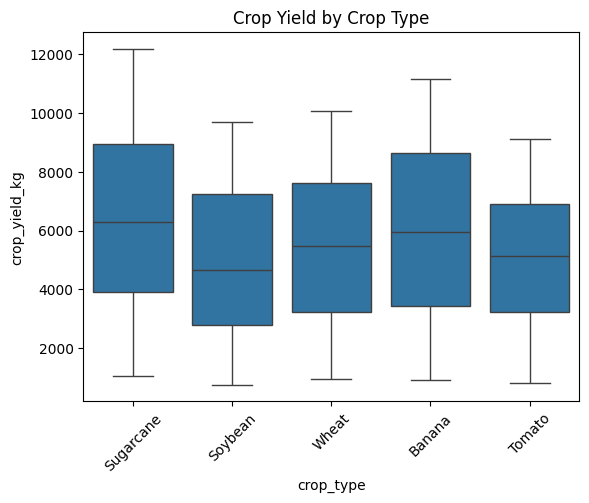

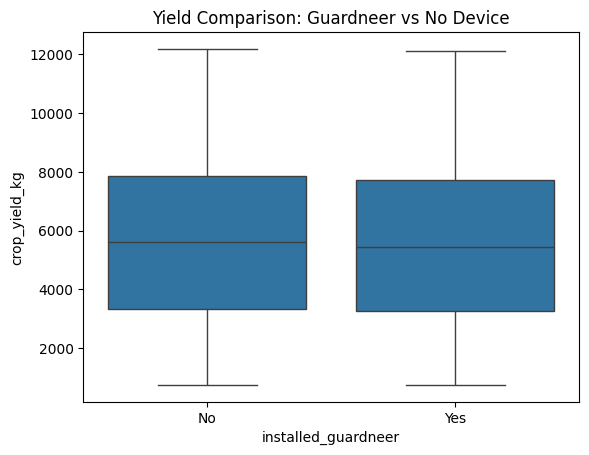

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Yield by crop
sns.boxplot(x='crop_type', y='crop_yield_kg', data=merged)
plt.title("Crop Yield by Crop Type")
plt.xticks(rotation=45)
plt.show()

# Guardneer impact
sns.boxplot(x='installed_guardneer', y='crop_yield_kg', data=merged)
plt.title("Yield Comparison: Guardneer vs No Device")
plt.show()


In [14]:
df = pd.read_csv("farm_master.csv")
df.head(), df.shape, df.info(), df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   farm_id                2227 non-null   object 
 1   zone                   2227 non-null   object 
 2   crop_type              2227 non-null   object 
 3   acreage                2227 non-null   float64
 4   soil_type              2227 non-null   object 
 5   installed_guardneer    2227 non-null   object 
 6   install_date           2227 non-null   object 
 7   farmer_name            2227 non-null   object 
 8   farmer_phone           2227 non-null   int64  
 9   govt_subsidy_eligible  2227 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 174.1+ KB


(     farm_id     zone  crop_type  acreage soil_type installed_guardneer  \
 0  FARM_0000   Satara  Sugarcane      5.2     Sandy                  No   
 1  FARM_0001  Jalgoan    Soybean      3.4     Loamy                  No   
 2  FARM_0002   Nashik      Wheat      1.9     Sandy                 Yes   
 3  FARM_0003  Jalgoan     Banana      2.5     Loamy                 Yes   
 4  FARM_0004  Jalgoan    Soybean      2.3     Sandy                  No   
 
   install_date  farmer_name  farmer_phone govt_subsidy_eligible  
 0   2024-01-21  Farmer_0000    9169864339                   Yes  
 1   2024-01-24  Farmer_0001    9799999041                    No  
 2   2024-01-18  Farmer_0002    9869758566                   Yes  
 3   2024-01-21  Farmer_0003    9870367623                   Yes  
 4   2024-02-23  Farmer_0004    9676588675                    No  ,
 (2227, 10),
 None,
 farm_id                  0
 zone                     0
 crop_type                0
 acreage                  0
 soil_t

In [15]:
df = pd.read_csv("irrigation_log.csv")
df.head(), df.shape, df.info(), df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405314 entries, 0 to 405313
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   farm_id                  405314 non-null  object 
 1   date                     405314 non-null  object 
 2   liters_used              405314 non-null  int64  
 3   irrigation_method        405314 non-null  object 
 4   rainfall_mm              405314 non-null  float64
 5   evaporation_rate_mm      405314 non-null  float64
 6   irrigation_duration_min  405314 non-null  int64  
 7   water_source_type        405314 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 24.7+ MB


(     farm_id        date  liters_used irrigation_method  rainfall_mm  \
 0  FARM_0000  2024-01-01        13124             Flood          2.3   
 1  FARM_0001  2024-01-01         6096              Drip          0.4   
 2  FARM_0002  2024-01-01         3654              Drip          0.9   
 3  FARM_0003  2024-01-01         5704              Drip          0.9   
 4  FARM_0004  2024-01-01         4195              Drip         10.2   
 
    evaporation_rate_mm  irrigation_duration_min water_source_type  
 0                  2.5                       58          Borewell  
 1                  4.0                       50              Well  
 2                  3.6                       54              Well  
 3                  3.1                       44             Canal  
 4                  3.4                       52              Well  ,
 (405314, 8),
 None,
 farm_id                    0
 date                       0
 liters_used                0
 irrigation_method          0
 rai

In [16]:
df = pd.read_csv("crop_yield_report.csv")
df.head(), df.shape, df.info(), df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13362 entries, 0 to 13361
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   farm_id             13362 non-null  object 
 1   month               13362 non-null  object 
 2   crop_yield_kg       13362 non-null  int64  
 3   fertilizer_used_kg  13362 non-null  float64
 4   pesticide_cost      13362 non-null  float64
 5   revenue_generated   13362 non-null  float64
 6   yield_category      13362 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 730.9+ KB


(     farm_id    month  crop_yield_kg  fertilizer_used_kg  pesticide_cost  \
 0  FARM_0000  2024-01           6289                16.8          678.93   
 1  FARM_0000  2024-02           6226                 9.9          246.47   
 2  FARM_0000  2024-03           6397                 8.2          975.93   
 3  FARM_0000  2024-04           6316                10.5          345.46   
 4  FARM_0000  2024-05           6264                13.2          432.98   
 
    revenue_generated yield_category  
 0           43621.21         Medium  
 1           69712.88         Medium  
 2           70332.81         Medium  
 3           44846.30         Medium  
 4           60579.88         Medium  ,
 (13362, 7),
 None,
 farm_id               0
 month                 0
 crop_yield_kg         0
 fertilizer_used_kg    0
 pesticide_cost        0
 revenue_generated     0
 yield_category        0
 dtype: int64)

In [17]:
df = pd.read_csv("soil_quality.csv")
df.head(), df.shape, df.info(), df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13362 entries, 0 to 13361
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   farm_id                 13362 non-null  object 
 1   month                   13362 non-null  object 
 2   ph_level                13362 non-null  float64
 3   salinity_ppm            13362 non-null  int64  
 4   EC                      13362 non-null  int64  
 5   moisture_percent        13362 non-null  float64
 6   organic_matter_percent  13362 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 730.9+ KB


(     farm_id    month  ph_level  salinity_ppm    EC  moisture_percent  \
 0  FARM_0000  2024-01      7.15           579   979              17.3   
 1  FARM_0000  2024-02      7.46           836  1003              15.3   
 2  FARM_0000  2024-03      6.86           681   757              19.6   
 3  FARM_0000  2024-04      6.86           341   737              24.2   
 4  FARM_0000  2024-05      6.73           388  1143              18.0   
 
    organic_matter_percent  
 0                    1.89  
 1                    3.92  
 2                    2.81  
 3                    1.85  
 4                    2.79  ,
 (13362, 7),
 None,
 farm_id                   0
 month                     0
 ph_level                  0
 salinity_ppm              0
 EC                        0
 moisture_percent          0
 organic_matter_percent    0
 dtype: int64)

In [18]:
df = pd.read_csv("guardneer_device_log.csv")
df.head(), df.shape, df.info(), df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276640 entries, 0 to 276639
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   farm_id          276640 non-null  object 
 1   date             276640 non-null  object 
 2   uptime_percent   276640 non-null  float64
 3   power_status     276640 non-null  object 
 4   signal_strength  276640 non-null  object 
 5   treatment_mode   276640 non-null  object 
 6   anomaly_flag     276640 non-null  object 
dtypes: float64(1), object(6)
memory usage: 14.8+ MB


(     farm_id        date  uptime_percent power_status signal_strength  \
 0  FARM_0002  2024-01-01           97.99           On            Good   
 1  FARM_0003  2024-01-01           96.72           On            Good   
 2  FARM_0005  2024-01-01           97.56           On            Good   
 3  FARM_0006  2024-01-01           99.02           On            Weak   
 4  FARM_0007  2024-01-01           96.07           On            Good   
 
     treatment_mode anomaly_flag  
 0           Hybrid           No  
 1           Hybrid           No  
 2            Pulse           No  
 3            Pulse          Yes  
 4  Electromagnetic           No  ,
 (276640, 7),
 None,
 farm_id            0
 date               0
 uptime_percent     0
 power_status       0
 signal_strength    0
 treatment_mode     0
 anomaly_flag       0
 dtype: int64)

In [20]:
df = pd.read_csv("weather.csv")
df.head(), df.shape, df.info(), df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              910 non-null    object 
 1   zone              910 non-null    object 
 2   temperature_c     910 non-null    float64
 3   humidity_percent  910 non-null    float64
 4   rainfall_mm       910 non-null    float64
 5   wind_speed_kmph   910 non-null    float64
 6   evaporation_mm    910 non-null    float64
dtypes: float64(5), object(2)
memory usage: 49.9+ KB


(         date     zone  temperature_c  humidity_percent  rainfall_mm  \
 0  2024-01-01     Pune           35.0              53.6          3.3   
 1  2024-01-01   Mumbai           32.6              75.8          0.1   
 2  2024-01-01   Nashik           33.1              60.4          0.5   
 3  2024-01-01   Satara           32.2              37.8          2.4   
 4  2024-01-01  Jalgoan           32.2              40.9          1.5   
 
    wind_speed_kmph  evaporation_mm  
 0              8.7             2.5  
 1             14.3             4.9  
 2             10.3             3.6  
 3             10.3             2.4  
 4             10.1             3.5  ,
 (910, 7),
 None,
 date                0
 zone                0
 temperature_c       0
 humidity_percent    0
 rainfall_mm         0
 wind_speed_kmph     0
 evaporation_mm      0
 dtype: int64)

In [21]:
print(irrigation['date'].min(), irrigation['date'].max())


2024-01-01 2024-06-30


In [22]:
# Example: join yield + farm + soil
combined = yield_df.merge(farm, on='farm_id')
combined = combined.merge(soil, on=['farm_id', 'month'])


In [23]:
# Convert dates
irrigation['date'] = pd.to_datetime(irrigation['date'])
device['date'] = pd.to_datetime(device['date'])
weather['date'] = pd.to_datetime(weather['date'])

In [24]:
# Extract month to join on monthly tables
yield_df['month'] = pd.to_datetime(yield_df['month'] + "-01")
soil['month'] = pd.to_datetime(soil['month'] + "-01")

In [25]:
# Join yield with farm
yield_soil_farm = yield_df.merge(farm, on='farm_id', how='left')
yield_soil_farm = yield_soil_farm.merge(soil, on=['farm_id', 'month'], how='left')


In [26]:
# Join irrigation + farm + weather
irrigation_weather = irrigation.merge(farm[['farm_id', 'zone']], on='farm_id', how='left')
irrigation_weather = irrigation_weather.merge(weather, on=['date', 'zone'], how='left')

# Join device with farm
device_farm = device.merge(farm, on='farm_id', how='left')

In [27]:
# Save all joined datasets
yield_soil_farm.to_csv("yield_soil_farm.csv", index=False)
irrigation_weather.to_csv("irrigation_weather.csv", index=False)
device_farm.to_csv("device_farm.csv", index=False)

"yield_soil_farm.csv", "irrigation_weather.csv", "device_farm.csv"

('yield_soil_farm.csv', 'irrigation_weather.csv', 'device_farm.csv')

In [28]:
import pandas as pd

yield_df = pd.read_csv("yield_soil_farm.csv")
irrigation_df = pd.read_csv("irrigation_weather.csv")
device_df = pd.read_csv("device_farm.csv")


In [29]:
print("Yield Dataset:")
print(yield_df.isnull().sum())

print("\nIrrigation Dataset:")
print(irrigation_df.isnull().sum())

print("\nDevice Dataset:")
print(device_df.isnull().sum())


Yield Dataset:
farm_id                   0
month                     0
crop_yield_kg             0
fertilizer_used_kg        0
pesticide_cost            0
revenue_generated         0
yield_category            0
zone                      0
crop_type                 0
acreage                   0
soil_type                 0
installed_guardneer       0
install_date              0
farmer_name               0
farmer_phone              0
govt_subsidy_eligible     0
ph_level                  0
salinity_ppm              0
EC                        0
moisture_percent          0
organic_matter_percent    0
dtype: int64

Irrigation Dataset:
farm_id                    0
date                       0
liters_used                0
irrigation_method          0
rainfall_mm_x              0
evaporation_rate_mm        0
irrigation_duration_min    0
water_source_type          0
zone                       0
temperature_c              0
humidity_percent           0
rainfall_mm_y              0
wind_speed_kmph

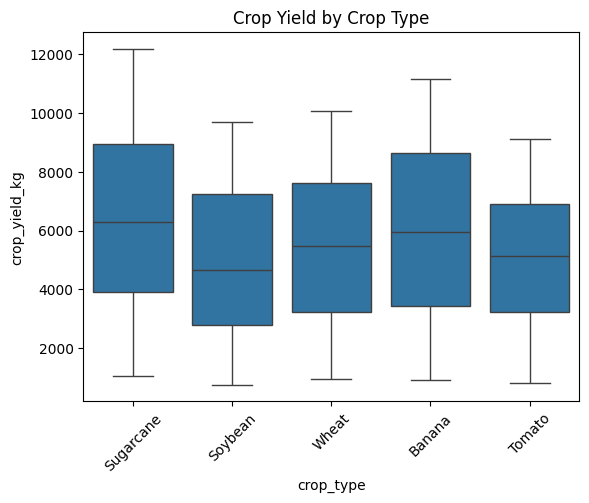

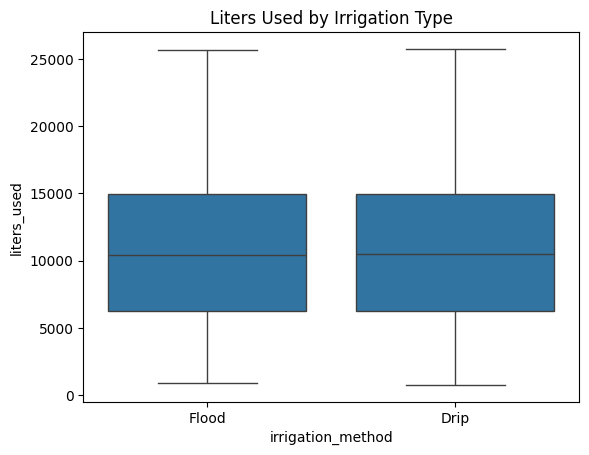

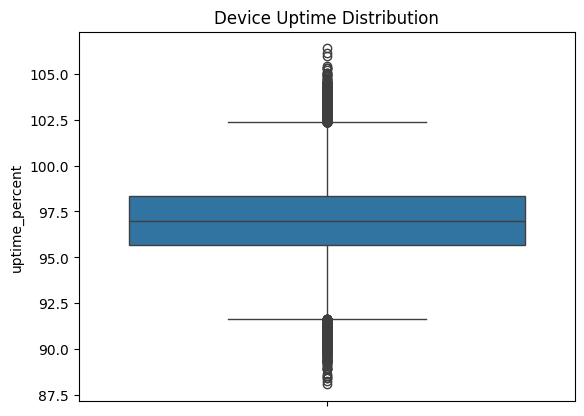

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Yield outliers
sns.boxplot(x='crop_type', y='crop_yield_kg', data=yield_df)
plt.title("Crop Yield by Crop Type")
plt.xticks(rotation=45)
plt.show()

# Water usage
sns.boxplot(x='irrigation_method', y='liters_used', data=irrigation_df)
plt.title("Liters Used by Irrigation Type")
plt.show()

# Uptime
sns.boxplot(y='uptime_percent', data=device_df)
plt.title("Device Uptime Distribution")
plt.show()


In [31]:
from scipy.stats import zscore

# Example: Flag outliers in crop yield
yield_df['yield_z'] = zscore(yield_df['crop_yield_kg'])
outliers = yield_df[yield_df['yield_z'].abs() > 3]

print("Outliers in crop yield:")
print(outliers[['farm_id', 'crop_yield_kg', 'yield_z']])


Outliers in crop yield:
Empty DataFrame
Columns: [farm_id, crop_yield_kg, yield_z]
Index: []


In [32]:
yield_df['fertilizer_z'] = zscore(yield_df['fertilizer_used_kg'])
yield_outliers = yield_df[yield_df['fertilizer_z'].abs() > 3]
print("Outliers in fertilizer used:")
print(yield_outliers[['farm_id', 'fertilizer_used_kg', 'fertilizer_z']])


Outliers in fertilizer used:
Empty DataFrame
Columns: [farm_id, fertilizer_used_kg, fertilizer_z]
Index: []


In [33]:
irrigation_df['liters_z'] = zscore(irrigation_df['liters_used'])
water_outliers = irrigation_df[irrigation_df['liters_z'].abs() > 3]
print("Water usage outliers:")
print(water_outliers[['farm_id', 'liters_used', 'liters_z']])


Water usage outliers:
Empty DataFrame
Columns: [farm_id, liters_used, liters_z]
Index: []


In [34]:
device_df['uptime_z'] = zscore(device_df['uptime_percent'])
uptime_outliers = device_df[device_df['uptime_z'].abs() > 3]
print("Device uptime outliers:")
print(uptime_outliers[['farm_id', 'uptime_percent', 'uptime_z']])


Device uptime outliers:
          farm_id  uptime_percent  uptime_z
138     FARM_0201           90.04 -3.479071
716     FARM_1055          103.99  3.496533
906     FARM_1332           90.35 -3.324057
1348    FARM_1973           90.98 -3.009030
1413    FARM_2067           90.91 -3.044033
...           ...             ...       ...
274682  FARM_1597          103.32  3.161504
275822  FARM_1033           90.92 -3.039033
276279  FARM_1709           90.96 -3.019031
276360  FARM_1824           90.97 -3.014031
276604  FARM_2166           90.44 -3.279053

[768 rows x 3 columns]


In [36]:
yield_df['profit_per_acre'] = yield_df['revenue_generated'] / farm.set_index('farm_id').loc[yield_df['farm_id'], 'acreage'].values


In [37]:
device_df['reliability_score'] = device_df['uptime_percent'] * (device_df['anomaly_flag'].apply(lambda x: 0.5 if x == 'Yes' else 1))


In [38]:
yield_df['soil_health_index'] = (
    (yield_df['moisture_percent'] * 0.4) +
    (100 - yield_df['salinity_ppm']) * 0.3 +
    (yield_df['organic_matter_percent'] * 0.3)
)


In [44]:
irrigation_df['water_risk_index'] = (
    irrigation_df['liters_used'] / (irrigation_df['rainfall_mm_x'] + 1)
)


In [42]:
import pandas as pd

# Load your irrigation and farm_master datasets
irrigation_df = pd.read_csv("irrigation_weather.csv")
farm_df = pd.read_csv("farm_master.csv")

# Step 1: Create a dictionary for acreage per farm_id
acreage_map = farm_df.set_index('farm_id')['acreage'].to_dict()

# Step 2: Create new column for liters per day per acre
# It means: total liters used that day divided by size of farm (in acres)
irrigation_df['liters_per_day_per_acre'] = irrigation_df.apply(
    lambda row: row['liters_used'] / acreage_map.get(row['farm_id'], 1),
    axis=1
)

# Step 3 (Optional): Save this version
irrigation_df.to_csv("irrigation_with_efficiency.csv", index=False)

# Preview new column
irrigation_df[['farm_id', 'date', 'liters_used', 'liters_per_day_per_acre']].head()


,farm_id,date,liters_used,liters_per_day_per_acre
0,FARM_0000,2024-01-01,13124,2523.846154
1,FARM_0001,2024-01-01,6096,1792.941176
2,FARM_0002,2024-01-01,3654,1923.157895
3,FARM_0003,2024-01-01,5704,2281.600000
4,FARM_0004,2024-01-01,4195,1823.913043


In [45]:
# Load necessary datasets
irrigation_df = pd.read_csv("irrigation_with_efficiency.csv")
farm_df = pd.read_csv("farm_master.csv")

# Create crop-wise water need map
ideal_water_map = {
    'Sugarcane': 2500,
    'Tomato': 1500,
    'Wheat': 2000,
    'Soybean': 1800,
    'Banana': 2200
}

# Create farm_id to crop_type and acreage mappings
crop_map = farm_df.set_index('farm_id')['crop_type'].to_dict()
acreage_map = farm_df.set_index('farm_id')['acreage'].to_dict()

# Create column: irrigation_need_gap
irrigation_df['ideal_liters'] = irrigation_df['farm_id'].apply(
    lambda fid: ideal_water_map[crop_map[fid]] * acreage_map[fid]
)

irrigation_df['irrigation_need_gap'] = (
    irrigation_df['ideal_liters'] - irrigation_df['liters_used']
)

# Optional: Save updated file
irrigation_df.to_csv("irrigation_with_gap.csv", index=False)

# Preview
irrigation_df[['farm_id', 'liters_used', 'ideal_liters', 'irrigation_need_gap']].head()


,farm_id,liters_used,ideal_liters,irrigation_need_gap
0,FARM_0000,13124,13000.0,-124.0
1,FARM_0001,6096,6120.0,24.0
2,FARM_0002,3654,3800.0,146.0
3,FARM_0003,5704,5500.0,-204.0
4,FARM_0004,4195,4140.0,-55.0


In [47]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv("yield_soil_farm_with_profit.csv")
farm_df = pd.read_csv("farm_master.csv")

# Add acreage
acreage_map = farm_df.set_index("farm_id")["acreage"].to_dict()
df["acreage"] = df["farm_id"].map(acreage_map)

# Step 1: Calculate yield per acre for each farm
df["yield_per_acre"] = df["crop_yield_kg"] / df["acreage"]

# Step 2: Get farms WITHOUT Guardneer
without_guardneer = df[df["installed_guardneer"] == "No"]

# Step 3: Get average yield per crop without Guardneer
avg_yield_without = without_guardneer.groupby("crop_type")["yield_per_acre"].mean().to_dict()

# Step 4: Calculate effectiveness score for ALL farms
df["guardneer_effectiveness_score"] = df.apply(
    lambda row: row["yield_per_acre"] / avg_yield_without[row["crop_type"]]
    if row["installed_guardneer"] == "Yes" else None,
    axis=1
)

# Save updated dataset
df.to_csv("yield_soil_farm_with_guardneer_score.csv", index=False)

# Preview
df[['farm_id', 'crop_type', 'installed_guardneer', 'yield_per_acre', 'guardneer_effectiveness_score']].head()


,farm_id,crop_type,installed_guardneer,yield_per_acre,guardneer_effectiveness_score
0,FARM_0000,Sugarcane,No,1209.423077,NaN
1,FARM_0000,Sugarcane,No,1197.307692,NaN
2,FARM_0000,Sugarcane,No,1230.192308,NaN
3,FARM_0000,Sugarcane,No,1214.615385,NaN
4,FARM_0000,Sugarcane,No,1204.615385,NaN


In [48]:
from google.colab import files

# Download core raw + engineered datasets
files.download("crop_yield_report.csv")
files.download("device_farm.csv")
files.download("farm_master.csv")
files.download("guardneer_device_log.csv")
files.download("irrigation_log.csv")
files.download("irrigation_weather.csv")
files.download("irrigation_with_efficiency.csv")
files.download("irrigation_with_gap.csv")
files.download("soil_quality.csv")
files.download("weather.csv")

# Final joined & enriched datasets
files.download("yield_soil_farm.csv")
files.download("yield_soil_farm_with_guardneer_score.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
import pandas as pd

df = pd.read_csv("yield_soil_farm_with_guardneer_score.csv")
df.columns.tolist()


['farm_id',
 'month',
 'crop_yield_kg',
 'fertilizer_used_kg',
 'pesticide_cost',
 'revenue_generated',
 'yield_category',
 'zone',
 'crop_type',
 'acreage',
 'soil_type',
 'installed_guardneer',
 'install_date',
 'farmer_name',
 'farmer_phone',
 'govt_subsidy_eligible',
 'ph_level',
 'salinity_ppm',
 'EC',
 'moisture_percent',
 'organic_matter_percent',
 'yield_per_acre',
 'guardneer_effectiveness_score']

In [51]:
import pandas as pd

yield_df = pd.read_csv("yield_soil_farm_with_guardneer_score.csv")
irrigation_eff = pd.read_csv("irrigation_with_efficiency.csv")
irrigation_gap = pd.read_csv("irrigation_with_gap.csv")
device_df = pd.read_csv("device_farm.csv")
farm_df = pd.read_csv("farm_master.csv")

In [52]:
efficiency_per_farm = irrigation_eff.groupby("farm_id")["liters_per_day_per_acre"].mean().reset_index()


In [53]:
gap_per_farm = irrigation_gap.groupby("farm_id")["irrigation_need_gap"].mean().reset_index()


In [54]:
device_df["reliability_score"] = device_df["uptime_percent"] * device_df["anomaly_flag"].apply(lambda x: 0.5 if x == "Yes" else 1)
reliability_per_farm = device_df.groupby("farm_id")["reliability_score"].mean().reset_index()


In [55]:
# Start with yield base
final_df = yield_df.copy()

# Merge in new features
final_df = final_df.merge(efficiency_per_farm, on="farm_id", how="left")
final_df = final_df.merge(gap_per_farm, on="farm_id", how="left")
final_df = final_df.merge(reliability_per_farm, on="farm_id", how="left")


In [56]:
final_df["soil_health_index"] = (
    (final_df["moisture_percent"] * 0.4) +
    ((100 - final_df["salinity_ppm"]) * 0.3) +
    (final_df["organic_matter_percent"] * 0.3)
)


In [57]:
final_df.to_csv("yield_soil_farm_with_all_features.csv", index=False)


In [58]:
# Reload farm data to get acreage
farm_df = pd.read_csv("farm_master.csv")

# Create acreage map for fast lookup
acreage_map = farm_df.set_index("farm_id")["acreage"].to_dict()

# Reload yield dataframe
yield_df = pd.read_csv("yield_soil_farm_with_guardneer_score.csv")

# Add acreage column
yield_df["acreage"] = yield_df["farm_id"].map(acreage_map)

# Calculate profit per acre
yield_df["profit_per_acre"] = yield_df["revenue_generated"] / yield_df["acreage"]

# (Optional) Save updated yield file again
yield_df.to_csv("yield_soil_farm_with_guardneer_score.csv", index=False)


In [60]:
import pandas as pd

# Load updated yield dataset with profit_per_acre and effectiveness
yield_df = pd.read_csv("yield_soil_farm_with_guardneer_score.csv")

# Load additional feature files (already aggregated)
efficiency_per_farm = pd.read_csv("irrigation_with_efficiency.csv").groupby("farm_id")["liters_per_day_per_acre"].mean().reset_index()
gap_per_farm = pd.read_csv("irrigation_with_gap.csv").groupby("farm_id")["irrigation_need_gap"].mean().reset_index()

# Load device logs and calculate reliability score
device_df = pd.read_csv("device_farm.csv")
device_df["reliability_score"] = device_df["uptime_percent"] * device_df["anomaly_flag"].apply(lambda x: 0.5 if x == "Yes" else 1)
reliability_per_farm = device_df.groupby("farm_id")["reliability_score"].mean().reset_index()

# 🔄 Start merging into final master dataset
final_df = yield_df.copy()

# Merge features
final_df = final_df.merge(efficiency_per_farm, on="farm_id", how="left")
final_df = final_df.merge(gap_per_farm, on="farm_id", how="left")
final_df = final_df.merge(reliability_per_farm, on="farm_id", how="left")

# Add soil health index
final_df["soil_health_index"] = (
    (final_df["moisture_percent"] * 0.4) +
    ((100 - final_df["salinity_ppm"]) * 0.3) +
    (final_df["organic_matter_percent"] * 0.3)
)

# Save the final complete dataset
final_df.to_csv("yield_soil_farm_with_all_features.csv", index=False)

# Preview to confirm
final_df.head()


,farm_id,month,crop_yield_kg,fertilizer_used_kg,pesticide_cost,revenue_generated,yield_category,zone,crop_type,acreage,...,EC,moisture_percent,organic_matter_percent,yield_per_acre,guardneer_effectiveness_score,profit_per_acre,liters_per_day_per_acre,irrigation_need_gap,reliability_score,soil_health_index
0,FARM_0000,2024-01-01,6289,16.8,678.93,43621.21,Medium,Satara,Sugarcane,5.2,...,979,17.3,1.89,1209.423077,NaN,8388.694231,2499.792899,1.076923,NaN,-136.213
1,FARM_0000,2024-02-01,6226,9.9,246.47,69712.88,Medium,Satara,Sugarcane,5.2,...,1003,15.3,3.92,1197.307692,NaN,13406.323077,2499.792899,1.076923,NaN,-213.504
2,FARM_0000,2024-03-01,6397,8.2,975.93,70332.81,Medium,Satara,Sugarcane,5.2,...,757,19.6,2.81,1230.192308,NaN,13525.540385,2499.792899,1.076923,NaN,-165.617
3,FARM_0000,2024-04-01,6316,10.5,345.46,44846.30,Medium,Satara,Sugarcane,5.2,...,737,24.2,1.85,1214.615385,NaN,8624.288462,2499.792899,1.076923,NaN,-62.065
4,FARM_0000,2024-05-01,6264,13.2,432.98,60579.88,Medium,Satara,Sugarcane,5.2,...,1143,18.0,2.79,1204.615385,NaN,11649.976923,2499.792899,1.076923,NaN,-78.363


In [61]:
import pandas as pd
df = pd.read_csv("yield_soil_farm_with_all_features.csv")
print("profit_per_acre" in df.columns)  # should return True

True


In [62]:
df.rename(columns={"profit_per_acre": "profit_per_acre"}, inplace=True)  # just to refresh column mapping
df.to_csv("clean_yield_soil_all_features.csv", index=False)
